<a href="https://colab.research.google.com/github/Abdellahbado/Adaptive-Learning-Rate-Scheduling-MNIST/blob/main/mnist_tuning_learning_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [ ]:
(X_temp, y_temp), (X_test, y_test) = keras.datasets.mnist.load_data()
X_valid, X_train = X_temp[:5000]/255, X_temp[5000:]/255
y_valid, y_train = y_temp[:5000], y_temp[5000:]
X_test = X_test/255


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
K = keras.backend


class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_batch_end(self, batch, logs=None):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate,
                    self.model.optimizer.learning_rate*self.factor)


In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(
    learning_rate=1e-3), metrics=["accuracy"])
expo_lr = ExponentialLearningRate(factor=1.005)


In [ ]:
history = model.fit(X_train, y_train, validation_data=(
    X_valid, y_valid), callbacks=expo_lr)


1719/1719 [==============================] - 21s 11ms/step - loss: nan - accuracy: 0.5925 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

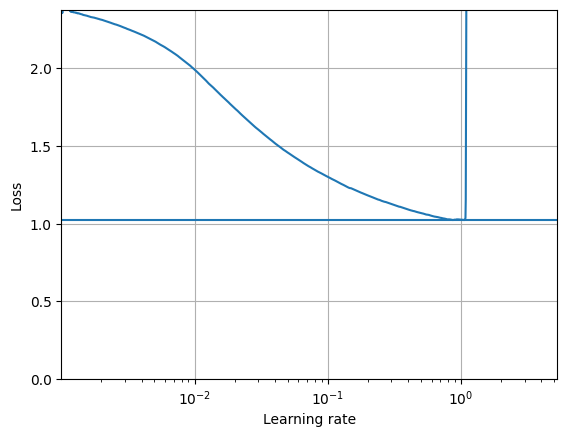

In [ ]:
import matplotlib.pyplot as plt

plt.plot(expo_lr.rates, expo_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expo_lr.losses), min(expo_lr.rates), max(expo_lr.rates))
plt.axis([min(expo_lr.rates), max(expo_lr.rates), 0, expo_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")


In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(
    learning_rate=3e-1), metrics=["accuracy"])


In [ ]:
import os
run_index = 1
run_logdir = os.path.join(os.curdir, "my_mnist_logs",
                          "run_{:03d}".format(run_index))
run_logdir


'./my_mnist_logs/run_001'

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)


In [ ]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])


Epoch 1/100
1719/1719 [==============================] - 18s 9ms/step - loss: 0.2337 - accuracy: 0.9262 - val_loss: 0.1015 - val_accuracy: 0.9720
Epoch 2/100
  36/1719 [..............................] - ETA: 7s - loss: 0.0935 - accuracy: 0.9740

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1719/1719 [==============================] - 7s 4ms/step - loss: 0.0927 - accuracy: 0.9713 - val_loss: 0.0930 - val_accuracy: 0.9738
Epoch 3/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0660 - accuracy: 0.9793 - val_loss: 0.0742 - val_accuracy: 0.9790
Epoch 4/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0459 - accuracy: 0.9851 - val_loss: 0.0794 - val_accuracy: 0.9788
Epoch 5/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0365 - accuracy: 0.9877 - val_loss: 0.0729 - val_accuracy: 0.9810
Epoch 6/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0290 - accuracy: 0.9905 - val_loss: 0.0786 - val_accuracy: 0.9806
Epoch 7/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0246 - accuracy: 0.9916 - val_loss: 0.0813 - val_accuracy: 0.9790
Epoch 8/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.0836 - val_accuracy: 0.98

In [ ]:
model = keras.models.load_model("my_mnist_model.h5")  # rollback to best model
model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0888 - accuracy: 0.9797


[0.08877868950366974, 0.9797000288963318]

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard - -logdir = ./my_mnist_logs - -port = 6006


ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2023-10-31 15:19:48.282382: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 15:19:48.282487: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 15:19:48.282526: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-31 15:19:49.480039: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC] [--host ADDR]
                   [--bind_all] [--port PORT] [--reuse_port BOOL] [--loa